# Prediction of Room Occupancy Based on Environmental Factors

Small computers, such as Arduino devices, can be used within buildings to record environmental variables from which simple and useful properties can be predicted.

One example is predicting whether a room or rooms are occupied based on environmental measures such as temperature, humidity, and related measures.

This is a type of common time series classification problem called room occupancy classification.

A standard time series classification data set is the “Occupancy Detection” problem available on the UCI Machine Learning repository:

*   [https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+](https://)

The dataset is described in the 2016 paper by Luis M. Candanedo and Véronique Feldheim:

*   https://www.sciencedirect.com/science/article/pii/S0378778815304357


---



---


The dataset can be downloaded directly from the link given above or in the following manner from:

*   https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Occupancy%20Detection


In [4]:
!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatraining.csv

!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest.csv

!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest2.csv

--2020-09-20 19:50:42--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatraining.csv
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 167.99.111.153
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|167.99.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404174 (395K) [text/plain]
Saving to: ‘datatraining.csv’

datatraining.csv    100%[===================>] 394.70K   466KB/s    in 0.8s    

2020-09-20 19:50:44 (466 KB/s) - ‘datatraining.csv’ saved [404174/404174]

--2020-09-20 19:50:44--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest.csv
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 167.99.111.153
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|167.99.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136740 (134K) [text/plain]
Saving to: ‘datatest.csv’



The datasets provided for training, validation and testing are in csv format so it must be imported using the pandas' read_csv method.

In [5]:
import pandas as pd#import pandas 

In [6]:
test = pd.read_csv('/content/datatest.csv')#datatest
val = pd.read_csv('/content/datatest2.csv')#datatest2
train = pd.read_csv('/content/datatraining.csv')#datatraining

In [7]:
print(train.head())#print first five rows of the train dataset
print(val.head())#print first five rows of the validation dataset
print(test.head())#print first five rows of the test dataset

             date  Temperature  Humidity  ...     CO2  HumidityRatio  Occupancy
0  2/4/2015 17:51        23.18   27.2720  ...  721.25       0.004793          1
1  2/4/2015 17:51        23.15   27.2675  ...  714.00       0.004783          1
2  2/4/2015 17:53        23.15   27.2450  ...  713.50       0.004779          1
3  2/4/2015 17:54        23.15   27.2000  ...  708.25       0.004772          1
4  2/4/2015 17:55        23.10   27.2000  ...  704.50       0.004757          1

[5 rows x 7 columns]
              date  Temperature  ...  HumidityRatio  Occupancy
0  2/11/2015 14:48      21.7600  ...       0.005021          1
1  2/11/2015 14:49      21.7900  ...       0.005009          1
2  2/11/2015 14:50      21.7675  ...       0.005022          1
3  2/11/2015 14:51      21.7675  ...       0.005022          1
4  2/11/2015 14:51      21.7900  ...       0.005030          1

[5 rows x 7 columns]
             date  Temperature  Humidity  ...         CO2  HumidityRatio  Occupancy
0  2/2/2015 14

In [8]:
print('Shape of the training data is '+str(train.shape))#print the shape of the train dataset
print('Shape of the validation data is '+str(val.shape))#print the shape of the validation dataset
print('Shape of the test data is '+str(test.shape))#print the shape of the test dataset

Shape of the training data is (8143, 7)
Shape of the validation data is (9752, 7)
Shape of the test data is (2665, 7)


All the datasets are of different dimensions:


1.   Training dataset has a shape (8143, 7) which means there are 7 columns and 8143 rows
2.   Validation dataset has a shape (9752, 7) which means there are 7 columns and 9752 rows
3.   Testing dataset has a shape (2665, 7) which means there are 7 columns and 2665 rows

Now let's have a closer look at the training data.

In [9]:
train.info()#detailed description of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


We can see that in total there are 7 features in our training dataset out of which 1 is of object type, 5 are float type and 1 is of int type but a closer look at the feature 'Occupany' will reveal that it is a binary feature and it is also the target feature.

Now let's have a look at how many null values are present in the datasets.

In [14]:
print('Training Data:\n')
print(train.isnull().sum())
print('-'*20)
print('Validation Data:\n')
print(val.isnull().sum())
print('-'*20)
print('Testing Data:\n')
print(test.isnull().sum())

Training Data:

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
--------------------
Validation Data:

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
--------------------
Testing Data:

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


Hence, there is no null value present in the datasets.

Now, let us have a look at the correlation between different numerical features.
We'll use the scatter matrix for this purpose.

In [15]:
train.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27b7cd5128>,
      dtype=object)

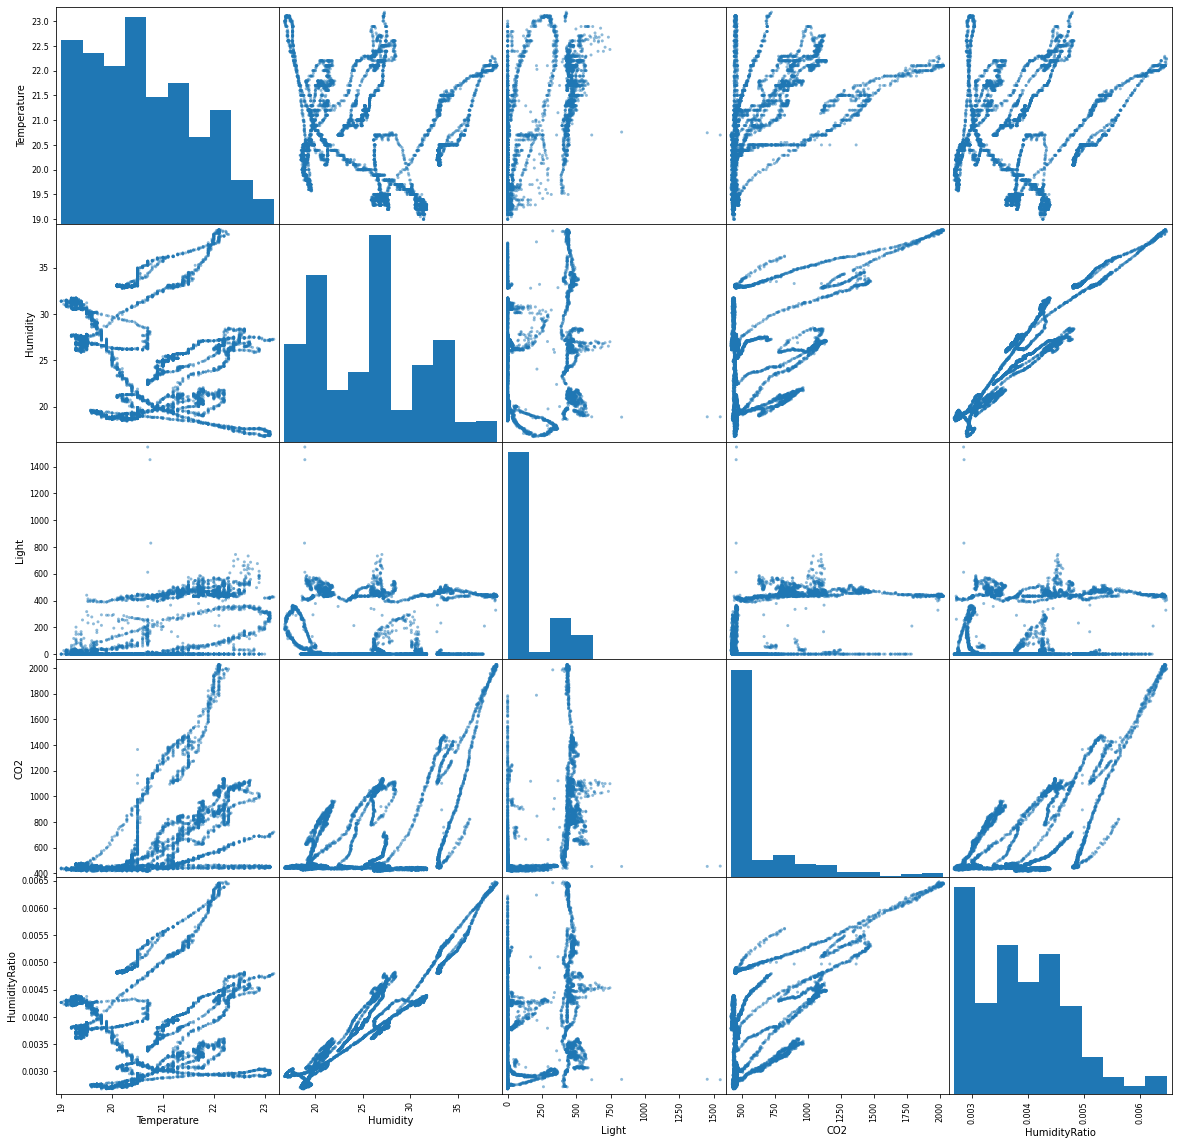

In [18]:
from pandas.plotting import scatter_matrix

num_features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scatter_matrix(train[num_features], figsize = (20, 20))

This scatter matrix reveals an interesting correlation between the features 'Humidity' and 'HumidityRatio'. They show a strong positive correlation.
We first fix a threshold 0.95 for feature selection. Features with correlation greater than 0.95 are assumed to be redundant and one of the fetures will be dropped.

Let us make heatmap to properly visualize the correlation

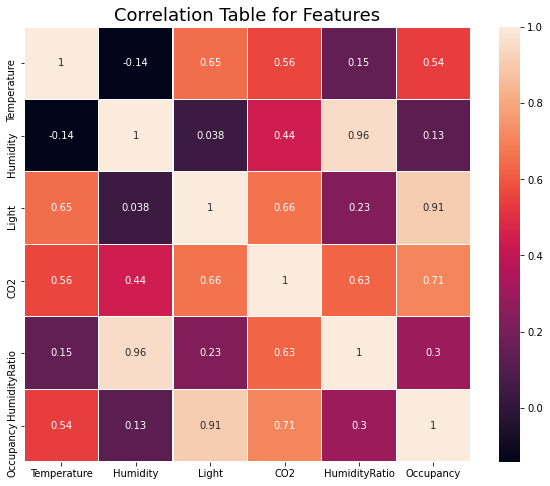

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train.corr(), annot=True, linewidths=.2)

As suspected, 'Humidity' and 'HumidityRatio' are strongly correlated.
Hence we can drop any one of the two features.
We will take care of the redundant features later. 

Let us check how many positive and negative data points are there in out training dataset.

In [21]:
a = train['Occupancy'][train['Occupancy'] == 1].count()#number of rows with occupancy 1
b = train['Occupancy'][train['Occupancy'] == 0].count()#number of rows with occupancy 0

print('Count of data points if occupied is '+str(a))
print('Count of data points if not occupied is '+str(b))

Count of data points if occupied is 1729
Count of data points if not occupied is 6414


Let's have a look at the date feature and find out if it will be useful.

When a csv file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather a Date Time object and Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [22]:
val['date'] = pd.to_datetime(val['date'])#to convert string object to python datetime format for the validation dataset
test['date'] = pd.to_datetime(test['date'])#to convert string object to python datetime format for the testing dataset
train['date'] = pd.to_datetime(train['date'])#to convert string object to python datetime format for the training dataset

Now we shall try to find out if there is any relation between a particular hour of the day and 'Occupancy'.
For this purpose we can create two lists of hours with each type of occupancy and the plot a relative frequency distribution using distplot method of seaborn package.

In [23]:
hours_1 = []
hours_0 = []
for date in train[train['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in train[train['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

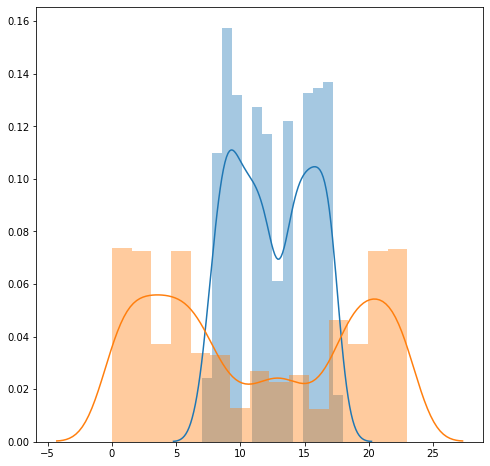

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

Interesting! Occupancy of rooms is seen only between 7:00 to 17:00.
Using this information we can create another feature named hour_of_day which will be a binary feature  and will be 1 if time is between 7:00 and 17:00 and will be 0 for rest of the hours.

In [25]:
test['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in test['date']]#list comprehension
val['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in val['date']]
train['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in train['date']]

Now we can get rid of the redundant feature HumidityRatio.

In [26]:
train.pop('HumidityRatio')
test.pop('HumidityRatio')
val.pop('HumidityRatio')

0       0.005021
1       0.005009
2       0.005022
3       0.005022
4       0.005030
          ...   
9747    0.004213
9748    0.004230
9749    0.004237
9750    0.004279
9751    0.004321
Name: HumidityRatio, Length: 9752, dtype: float64

Now let's get rid of the feature 'date'.

In [27]:
train.pop('date')
test.pop('date')
val.pop('date')

0      2015-02-11 14:48:00
1      2015-02-11 14:49:00
2      2015-02-11 14:50:00
3      2015-02-11 14:51:00
4      2015-02-11 14:51:00
               ...        
9747   2015-02-18 09:15:00
9748   2015-02-18 09:16:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:17:00
9751   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]

In [28]:
train.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

In [29]:
test.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

In [30]:
val.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

Now we are left with 5 features which'll be used for training and 1 target feature.

Let us check what the distribution of all the feature values look like using boxplot.

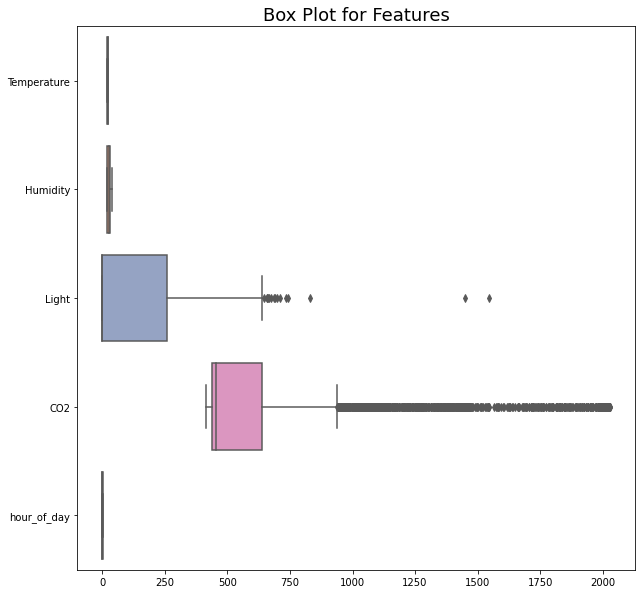

In [31]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data = train.drop(['Occupancy'], axis = 1), orient="h", palette="Set2")

Distribution is very different for all the features.
Let's bring them all on the same scale using normalization.

In [32]:
import numpy as np

x_train = np.array(train.drop(['Occupancy'], axis = 1))
y_train = np.array(train['Occupancy'])

x_val = np.array(val.drop(['Occupancy'], axis = 1))
y_val = np.array(val['Occupancy'])

x_test = np.array(test.drop(['Occupancy'], axis = 1))
y_test = np.array(test['Occupancy'])

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

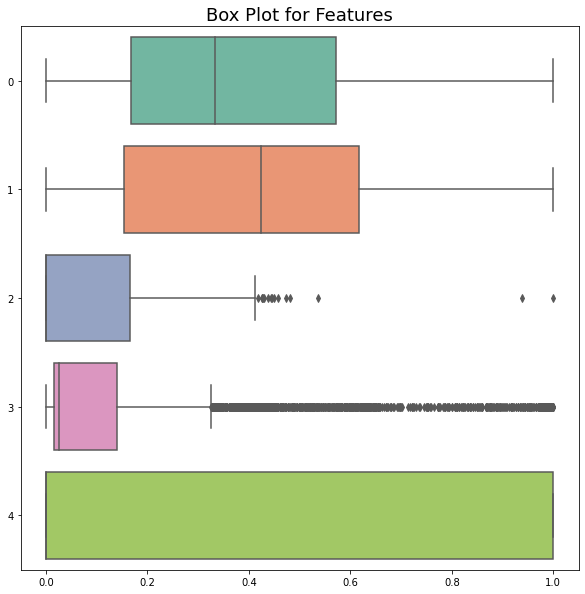

In [34]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data = x_train, orient="h", palette="Set2")

### Prediction using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR_clf = LogisticRegression()
LR_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr_pred = LR_clf.predict(x_val)
print('Logistic Regression performs with a validation accuracy of '+str(accuracy_score(y_val, lr_pred)*100)+'%')

Logistic Regression performs with a validation accuracy of 97.56972928630024%


Logistic regression provides us with a model which has an accuracy score of ~97% on the validation data.

### Prediction using Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

t_clf = DecisionTreeClassifier()
t_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let us visualize this unregulated decision tree.

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

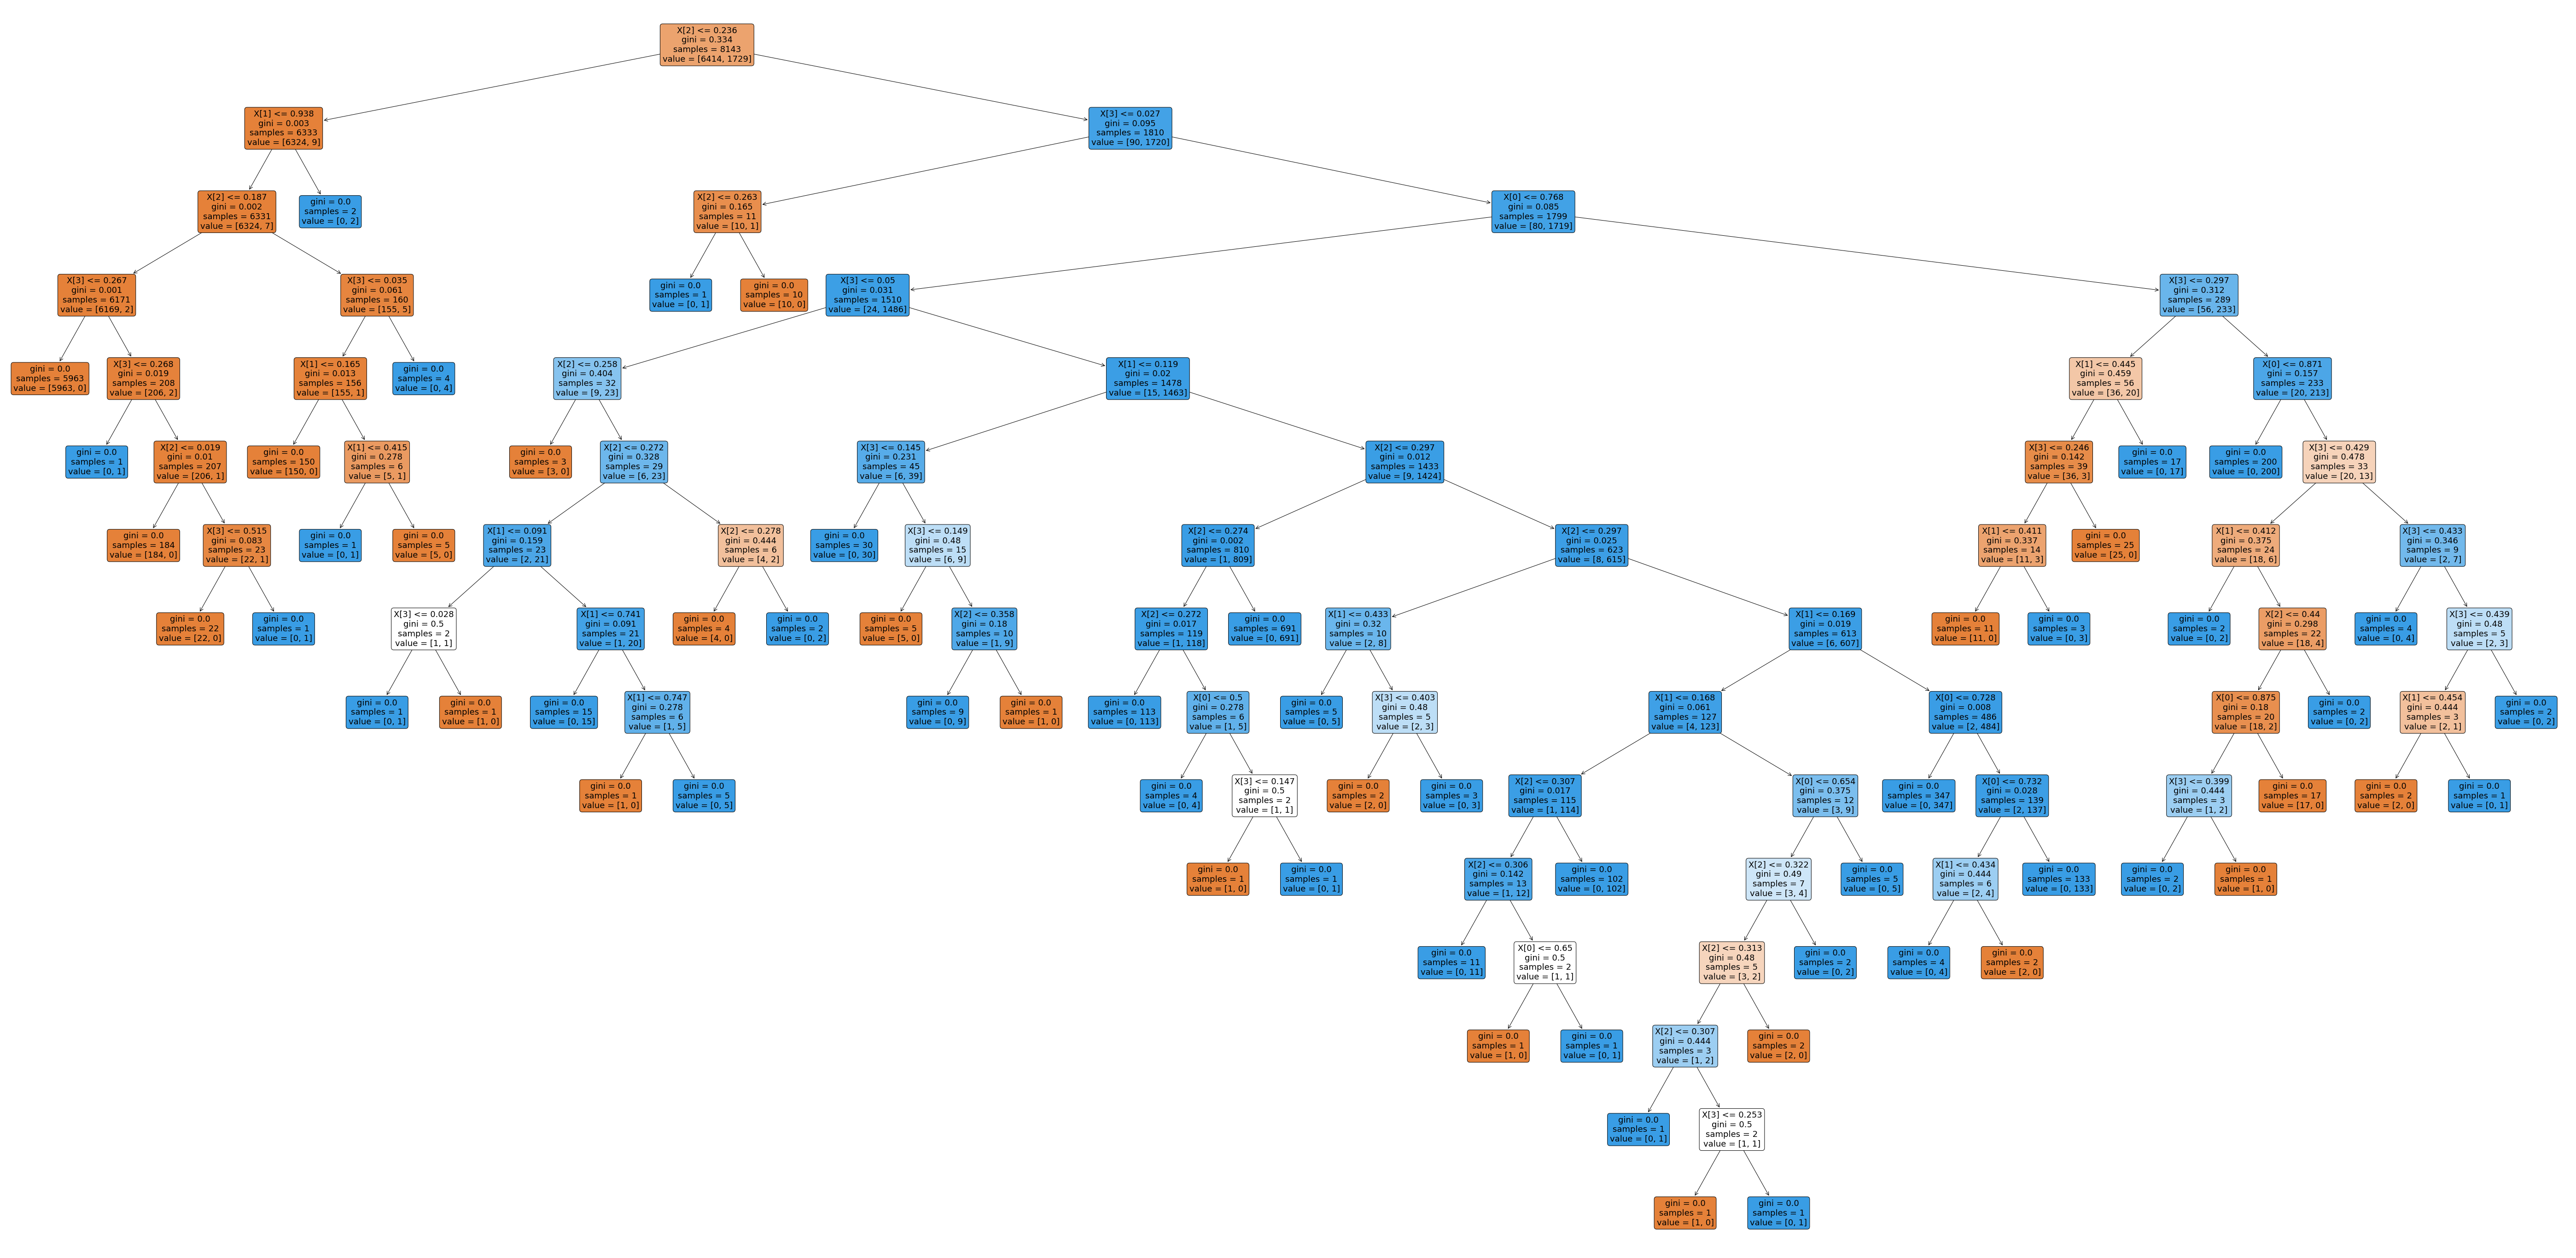

In [40]:
from sklearn import tree
rcParams['figure.figsize'] = 100,50
plot = tree.plot_tree(t_clf, rounded = True, filled = True)

In [46]:
t_pred = t_clf.predict(x_val)
print('Decision Tree performs with a validation accuracy of '+str(accuracy_score(y_val, t_pred)*100)+'%')

Decision Tree performs with a validation accuracy of 93.4577522559475%


With an accuracy score of ~93%, this unregulated decision tree performs poorly compared to logistic regression.

### Prediction using Support Vector Machines

In [47]:
from sklearn import svm

sv_clf = svm.SVC()
sv_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
sv_pred = sv_clf.predict(x_val)
print('Support Vector Classifier performs with a validation accuracy of '+str(accuracy_score(y_val, sv_pred)*100)+'%')

Support Vector Classifier performs with a validation accuracy of 98.78999179655456%


With support vector machine we get an accuracy of ~98.78% on the validation data which is the best performance so far!

### Prediction using Neural Networks

Let's create a basic model with 1 input layer, 2 hidden layers and 1 output layer.

In [52]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(32, activation = 'relu', input_dim = 5),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


Let us train this model for 15 epochs.

In [53]:
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs = 15,
                    verbose = 1)

Epoch 1/15
255/255 [==============================] - 1s 5ms/step - loss: 0.2188 - accuracy: 0.9210 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 2/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0754 - accuracy: 0.9791 - val_loss: 0.0689 - val_accuracy: 0.9791
Epoch 3/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9832 - val_loss: 0.0562 - val_accuracy: 0.9877
Epoch 4/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0525 - accuracy: 0.9853 - val_loss: 0.0587 - val_accuracy: 0.9768
Epoch 5/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0480 - accuracy: 0.9865 - val_loss: 0.0439 - val_accuracy: 0.9909
Epoch 6/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0526 - val_accuracy: 0.9888
Epoch 7/15
255/255 [==============================] - 1s 4ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0475 - val_accuracy: 0.9909
Epoch 

In [54]:
print('Neural Network Classifier performs with a validation accuracy of '+str(history.history['val_accuracy'][-1]*100)+'%')

Neural Network Classifier performs with a validation accuracy of 98.82075190544128%


With a validation accuracy of ~98.82%, neural network performs the best.

Now, the best two algorithms for this problem are Support Vector Machines and Neural Networks.
Let us now compare them based on their accuracy score on the testing data.

In [55]:
sv_pred_test = sv_clf.predict(x_test)
print('Support Vector Classifier performs with a test accuracy of '+str(accuracy_score(y_test, sv_pred_test)*100)+'%')

Support Vector Classifier performs with a test accuracy of 97.07317073170731%


In [56]:
nn_pred = model.predict(x_test)
print('Neural Network Classifier performs with a test accuracy of '+str(accuracy_score(y_test, nn_pred.round())*100)+'%')

Neural Network Classifier performs with a test accuracy of 97.78611632270169%


Neural Network seems to work the best but Support Vector Machine also seems to perform really good.